In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Loading data from source
high = pd.read_csv('data/highp_finalresults.csv')
low = pd.read_csv('data/lowp_finalresults.csv')
high.head()

,ident,it,t,a(i),emegas(i),emepla(i)/emet,rplanet(i)/radtie,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas
0,0,199993,20000001,0.030237,0.004911,1.904923,1.9029824602178687,4.368174e+32,59.88237,1.110726,51.287674,0.13,1,0.3,1,0.1,0.07707,9268935
1,0,199993,20000001,0.818832,0.000238,1.642056,1.8150047639338782,4.368174e+32,59.88237,1.110726,51.287674,0.13,1,0.3,1,0.1,0.07707,9268935
2,0,199993,20000001,2.124022,0.000000,1.786051,1.8659921485803184,4.368174e+32,59.88237,1.110726,51.287674,0.13,1,0.3,1,0.1,0.07707,9268935
3,0,199993,20000001,5.123330,0.000000,0.843418,1.4538852266916131,4.368174e+32,59.88237,1.110726,51.287674,0.13,1,0.3,1,0.1,0.07707,9268935
4,0,199993,20000001,6.932367,0.000000,0.477013,1.2031125383842882,4.368174e+32,59.88237,1.110726,51.287674,0.13,1,0.3,1,0.1,0.07707,9268935


In [3]:
low.tail()

,ident,it,t,a(i),emegas(i),emepla(i)/emet,rplanet(i)/radtie,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas
31813,2974,199890,20000001,4.495716,0,0.594153,1.2944807364978042,4.092467e+32,50.698605,6.853647,9.907135,0.018,1,0.1,1,0.1,0.408212,7710610.5
31814,2974,199890,20000001,5.055471,0,0.374487,1.1100260808524707,4.092467e+32,50.698605,6.853647,9.907135,0.018,1,0.1,1,0.1,0.408212,7710610.5
31815,2974,199890,20000001,5.741148,0,0.254932,0.97674134618047792,4.092467e+32,50.698605,6.853647,9.907135,0.018,1,0.1,1,0.1,0.408212,7710610.5
31816,2974,199890,20000001,6.215687,0,0.111676,0.74183642795434679,4.092467e+32,50.698605,6.853647,9.907135,0.018,1,0.1,1,0.1,0.408212,7710610.5
31817,2974,199890,20000001,7.612730,0,0.064155,0.61682163672276424,4.092467e+32,50.698605,6.853647,9.907135,0.018,1,0.1,1,0.1,0.408212,7710610.5


In [4]:
high.describe()

,ident,it,t,a(i),emegas(i),emepla(i)/emet,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas
count,32465.000000,32465.000000,32465,32465.000000,3.246500e+04,32465.000000,3.246500e+04,32465.000000,32465.000000,32465.000000,32465.000000,32465,32465.0,32465,3.246500e+04,32465.000000,32465.000000
mean,1483.424457,197467.410966,20000001,3.400574,7.167241e+00,7.630333,5.749874e+32,45.545752,5.963431,32.194985,0.043325,1,0.3,1,1.000000e-01,-0.001367,3801386.541862
std,859.799152,8122.269582,0,3.696724,2.198142e+02,219.589599,2.784088e+32,8.270644,4.245843,33.406671,0.039576,0,0.0,0,1.871346e-09,0.211647,2503499.813300
min,0.000000,9292.000000,20000001,0.002813,0.000000e+00,0.050002,2.005149e+32,25.340290,1.007152,1.515903,0.003100,1,0.3,1,1.000000e-01,-0.688720,1001011.375000
25%,739.000000,198311.000000,20000001,0.913345,0.000000e+00,0.098376,3.379212e+32,39.816555,2.955550,12.484508,0.019000,1,0.3,1,1.000000e-01,-0.145420,1687664.250000
50%,1484.000000,199620.000000,20000001,2.140342,0.000000e+00,0.229774,5.161603e+32,44.740940,4.808668,21.058982,0.030000,1,0.3,1,1.000000e-01,0.000306,2998146.500000
75%,2227.000000,199907.000000,20000001,4.670935,2.295691e-10,0.669832,7.774028e+32,50.544758,7.681329,39.672398,0.054000,1,0.3,1,1.000000e-01,0.143216,5405266.000000
max,2974.000000,199999.000000,20000001,37.368091,1.963193e+04,19634.764964,1.198218e+33,91.153824,48.223476,372.454042,0.320000,1,0.3,1,1.000000e-01,0.774710,9985367.000000


In [5]:
low.describe()

,ident,it,t,a(i),emegas(i),emepla(i)/emet,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas
count,31818.000000,31818.000000,31818,31818.000000,3.181800e+04,31818.000000,3.181800e+04,31818.000000,31818.000000,31818.000000,31818.000000,31818,31818.0,31818,3.181800e+04,31818.000000,31818.000000
mean,1483.921742,197203.880068,20000001,3.427210,9.246545e+00,9.686454,5.849130e+32,45.464044,5.840116,33.392593,0.044799,1,0.1,1,1.000000e-01,0.000018,3872819.741249
std,858.855403,8603.353319,0,3.677722,3.013759e+02,301.194360,2.818730e+32,8.256636,4.190124,34.231217,0.040328,0,0.0,0,1.890277e-09,0.211657,2531576.085274
min,0.000000,2219.000000,20000001,0.002920,0.000000e+00,0.050000,2.005149e+32,25.340290,1.007152,1.515903,0.003100,1,0.1,1,1.000000e-01,-0.688720,1001011.375000
25%,744.000000,198116.000000,20000001,0.959344,0.000000e+00,0.099108,3.424640e+32,39.637379,2.885965,13.020100,0.019000,1,0.1,1,1.000000e-01,-0.144467,1716789.500000
50%,1486.000000,199593.000000,20000001,2.174640,0.000000e+00,0.236658,5.265640e+32,44.679085,4.708793,22.150014,0.031000,1,0.1,1,1.000000e-01,0.001603,3071022.500000
75%,2229.000000,199903.000000,20000001,4.676797,1.394413e-10,0.697109,7.960997e+32,50.480225,7.520444,41.050120,0.056000,1,0.1,1,1.000000e-01,0.144376,5562983.500000
max,2974.000000,199998.000000,20000001,38.434044,2.533239e+04,25335.050144,1.198218e+33,91.153824,48.223476,372.454042,0.320000,1,0.1,1,1.000000e-01,0.774710,9985367.000000


## Data handling 

---

Data are organized in such way that each observation represent a formed planet. We have to collapse data by planetary systems ($ident$). However, before do this we should verify that variables don't have variation between systems. At the end, we must create the final variables to predict:

Variables:

    1. Number of planets.
    2. Planets total mass.
    3. Mass efficiency.

Tasks:
    1. Create final variables.
    2. Collapse data by $ident$

### Non-Relevant variables

There are several variables in each dataFrame that don't give extra information because those don't have variance over the set, for example:
    
    1. t.
    2. gama.
    3. fpert.
    4. constmigI.
    
So we can drop them. Futhermore, we can ignore $ident$ information because system identifier should not give any information about the dependet variables.

----

In the case of the variable $apert$ we have no variation inside sets but variation between groups (high & low). It should be usuful to check if this variable has effect over the dependent variables in order to include $apert$ as a relevant varaible to explain planetary formation. 

As the sets are divided by $apert$ we have to check if there is a statistical difference over the dependent variables. In order to do that we will use sampling techniques to verify this hypotesis. 

In [6]:
def collapse_by_system(dataFrame):
    ident_systems = unique(dataFrame['ident'])
    num_systems = len(ident_systems)
    print('There is only '+ str(num_systems),'non-empty observations (systems).')
    dataFrame_systems = pd.DataFrame(np.nan, index = range(0,0), columns = dataFrame.columns ) 

    num_planets = np.zeros(num_systems)
    solid_mass = np.zeros(num_systems)
    mass_efficiency = np.zeros(num_systems)
    for sys in range(0,num_systems):
        system = ident_systems[sys]
        actual = dataFrame[dataFrame['ident'] == system]
        num_planets[sys] = actual['ident'].count()
        solid_mass[sys] = sum(actual['emepla(i)/emet'])
        mass_efficiency[sys] = solid_mass[sys]/np.min(actual['emed'])
        dataFrame_systems.loc[sys,:] = actual.iloc[0,:]
    
    dataFrame_systems['num_planets'] = num_planets
    dataFrame_systems['solid_mass'] = solid_mass
    dataFrame_systems['mass_efficiency'] = mass_efficiency
    
    Y_dataFrame = dataFrame_systems[['num_planets','solid_mass','mass_efficiency']]
    X_dataFrame = dataFrame_systems[['it', 'emestar', 'rc', 'qest', 'sigmag_0', 'emed', 'apert', 'emetal','taugas']]
    return X_dataFrame, Y_dataFrame

In [7]:
X_high,Y_high = collapse_by_system(high)

('There is only 2770', 'non-empty observations (systems).')


In [8]:
X_low,Y_low = collapse_by_system(low)

('There is only 2735', 'non-empty observations (systems).')


In [9]:
Y_high.describe()

,num_planets,solid_mass,mass_efficiency
count,2770.000000,2770.000000,2770.000000
mean,11.720217,89.429150,793.714892
std,4.113511,781.593890,4431.444540
min,1.000000,0.050170,2.365703
25%,9.000000,2.584679,89.409493
50%,11.500000,5.692946,152.231581
75%,14.000000,9.599401,249.726699
max,26.000000,19642.994561,84267.424685


In [10]:
Y_low.describe()

,num_planets,solid_mass,mass_efficiency
count,2735.000000,2735.000000,2735.000000
mean,11.633638,112.688695,864.516450
std,3.814312,1032.425930,5256.659310
min,1.000000,0.050030,2.805725
25%,9.000000,2.356628,85.067460
50%,12.000000,5.527959,144.769357
75%,14.000000,9.744384,242.960283
max,24.000000,25343.629111,87391.824520


In [11]:
# Save new data
X_low.to_csv('data/X_low.csv')
Y_low.to_csv('data/Y_low.csv')
X_high.to_csv('data/X_high.csv')
Y_high.to_csv('data/Y_high.csv')

# Import of data

In [12]:
from sklearn import svm
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [13]:
X_low=np.genfromtxt('data/X_low.csv', delimiter=',', dtype='float', skip_header=1)[:,1:]
Y_low=np.genfromtxt('data/Y_low.csv', delimiter=',', dtype='float', skip_header=1)[:,1:]
X_high=np.genfromtxt('data/X_high.csv', delimiter=',', dtype='float', skip_header=1)[:,1:]
Y_high=np.genfromtxt('data/Y_high.csv', delimiter=',', dtype='float', skip_header=1)[:,1:]
X_low=np.delete(X_low, 6, axis=1)
X_high=np.delete(X_high, 6, axis=1)

In [14]:
scax_low = sk.preprocessing.StandardScaler().fit(X_low)
scax_high = sk.preprocessing.StandardScaler().fit(X_high)
scay_low = sk.preprocessing.StandardScaler().fit(Y_low)
scay_high = sk.preprocessing.StandardScaler().fit(Y_high)

X_low=scax_low.transform(X_low)
X_high=scax_high.transform(X_high)
Y_low=scay_low.transform(Y_low)
Y_high=scay_high.transform(Y_high)

# Regularization-Low

# A continuacion la corresponencia entre numero de atributo/valor: 
 0 -> Iteration index. 
 1 -> Stellar mass.
 2 -> Disk outer cutoff radius.
 3 -> Toomre Q at min radius.
 4 -> Maximum dust surface density.
 5 -> Disk mass.
 6 -> Metallicity wrt solar.
 7 -> Gas dissipation timescale.

In [15]:
from sklearn import linear_model
from sklearn.metrics import r2_score

In [16]:
def relative_importance(coefs):
    coe=np.abs(coefs)
    tot=float(np.sum(coe))
    for i in range(len(coe)):
        donde=np.where(coe==np.max(coe))[0][0]
        imp=coe[donde]/tot *100
        print "El atributo " + str(donde) + ". Tiene importancia relativa de: " + str(round(imp,2)) + "%"
        coe[donde]=-1

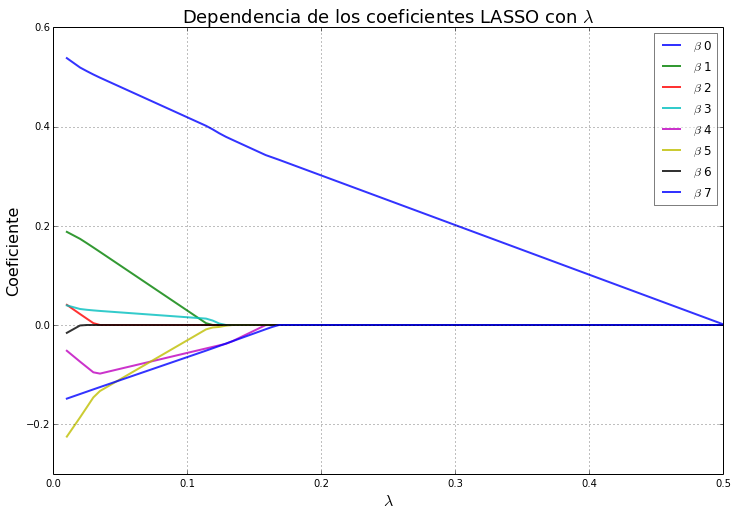

Para la prediccion de numero de planetas para sistemas con baja perturbacion (lambda = 0.01): 

El atributo 0. Tiene importancia relativa de: 43.14%
El atributo 5. Tiene importancia relativa de: 18.04%
El atributo 1. Tiene importancia relativa de: 15.05%
El atributo 7. Tiene importancia relativa de: 11.9%
El atributo 4. Tiene importancia relativa de: 4.17%
El atributo 2. Tiene importancia relativa de: 3.26%
El atributo 3. Tiene importancia relativa de: 3.17%
El atributo 6. Tiene importancia relativa de: 1.27%


In [17]:
N=100
L=0.5
matrix = np.zeros((8,N))
alphas = np.linspace(0.01,L,N)

for i in range(len(alphas)):
    clf = linear_model.Lasso(alpha=alphas[i])
    clf.fit(X_low, Y_low[:,0])
    matrix[:,i]=clf.coef_

plt.figure(figsize=(12,8))
for j in range(8):
    plt.plot(alphas, matrix[j,:], lw=2, alpha=0.8, label=r"$\beta $ "+str(j))
plt.legend(framealpha=0.5)
plt.grid()
plt.xlabel(r"$\lambda$", fontsize=16)
plt.ylabel(r"Coeficiente", fontsize=16)
plt.title(r"Dependencia de los coeficientes LASSO con $\lambda$", fontsize=18)
plt.show()
plt.close()

print "Para la prediccion de numero de planetas para sistemas con baja perturbacion (lambda = 0.01): \n"
relative_importance(matrix[:,0])

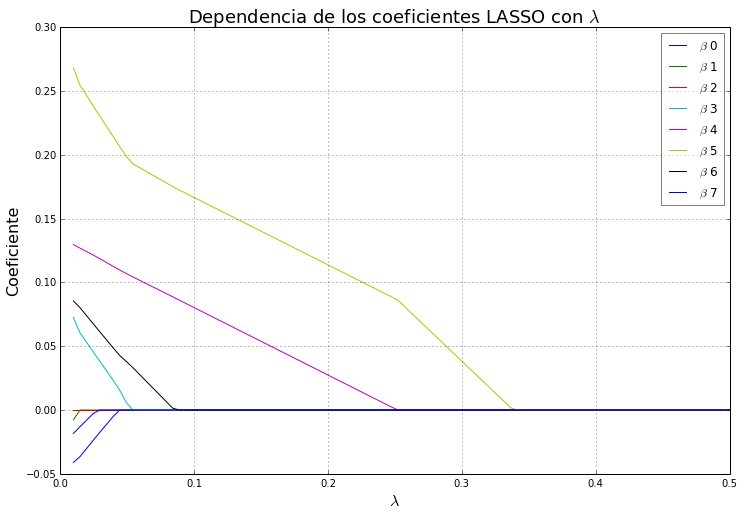

Para la prediccion de masa total para sistemas con baja perturbacion (lambda = 0.01): 

El atributo 5. Tiene importancia relativa de: 43.04%
El atributo 4. Tiene importancia relativa de: 20.81%
El atributo 6. Tiene importancia relativa de: 13.73%
El atributo 3. Tiene importancia relativa de: 11.63%
El atributo 0. Tiene importancia relativa de: 6.59%
El atributo 7. Tiene importancia relativa de: 2.95%
El atributo 1. Tiene importancia relativa de: 1.23%
El atributo 2. Tiene importancia relativa de: 0.0%


In [18]:
for i in range(len(alphas)):
    clf = linear_model.Lasso(alpha=alphas[i])
    clf.fit(X_low, Y_low[:,1])
    matrix[:,i]=clf.coef_

plt.figure(figsize=(12,8))
for j in range(8):
    plt.plot(alphas, matrix[j,:], lw=1, label=r"$\beta$ "+str(j))
plt.legend(framealpha=0.5)
plt.grid()
plt.xlabel(r"$\lambda$", fontsize=16)
plt.ylabel(r"Coeficiente", fontsize=16)
plt.title(r"Dependencia de los coeficientes LASSO con $\lambda$", fontsize=18)
plt.show()
plt.close()

print "Para la prediccion de masa total para sistemas con baja perturbacion (lambda = 0.01): \n"
relative_importance(matrix[:,0])

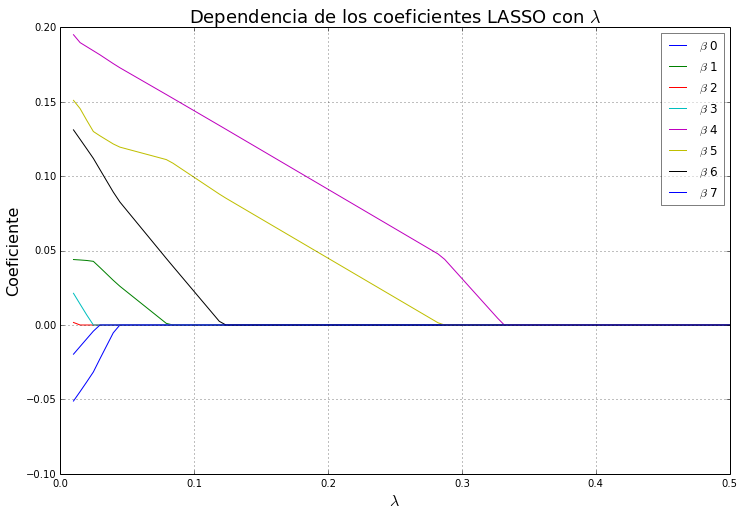

Para la prediccion de la eficiencia de masa para sistemas con baja perturbacion (lambda = 0.01): 

El atributo 4. Tiene importancia relativa de: 31.73%
El atributo 5. Tiene importancia relativa de: 24.55%
El atributo 6. Tiene importancia relativa de: 21.33%
El atributo 0. Tiene importancia relativa de: 8.31%
El atributo 1. Tiene importancia relativa de: 7.15%
El atributo 3. Tiene importancia relativa de: 3.46%
El atributo 7. Tiene importancia relativa de: 3.19%
El atributo 2. Tiene importancia relativa de: 0.28%


In [19]:
for i in range(len(alphas)):
    clf = linear_model.Lasso(alpha=alphas[i])
    clf.fit(X_low, Y_low[:,2])
    matrix[:,i]=clf.coef_

plt.figure(figsize=(12,8))
for j in range(8):
    plt.plot(alphas, matrix[j,:], lw=1, label=r"$\beta $ "+str(j))
plt.legend(framealpha=0.5)
plt.grid()
plt.xlabel(r"$\lambda$", fontsize=16)
plt.ylabel(r"Coeficiente", fontsize=16)
plt.title(r"Dependencia de los coeficientes LASSO con $\lambda$", fontsize=18)
plt.show()
plt.close()

print "Para la prediccion de la eficiencia de masa para sistemas con baja perturbacion (lambda = 0.01): \n"
relative_importance(matrix[:,0])

# Regularization-High

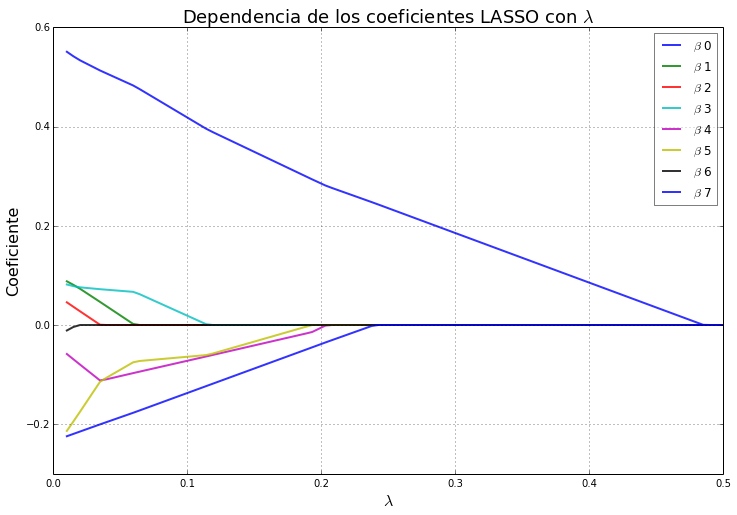

Para la prediccion de numero de planetas para sistemas con alta perturbacion (lambda = 0.01): 

El atributo 0. Tiene importancia relativa de: 43.25%
El atributo 7. Tiene importancia relativa de: 17.61%
El atributo 5. Tiene importancia relativa de: 16.76%
El atributo 1. Tiene importancia relativa de: 6.91%
El atributo 3. Tiene importancia relativa de: 6.41%
El atributo 4. Tiene importancia relativa de: 4.59%
El atributo 2. Tiene importancia relativa de: 3.59%
El atributo 6. Tiene importancia relativa de: 0.87%


In [20]:
for i in range(len(alphas)):
    clf = linear_model.Lasso(alpha=alphas[i])
    clf.fit(X_high, Y_high[:,0])
    matrix[:,i]=clf.coef_

plt.figure(figsize=(12,8))
for j in range(8):
    plt.plot(alphas, matrix[j,:], lw=2, alpha=0.8, label=r"$\beta $ "+str(j))
plt.legend(framealpha=0.5)
plt.grid()
plt.xlabel(r"$\lambda$", fontsize=16)
plt.ylabel(r"Coeficiente", fontsize=16)
plt.title(r"Dependencia de los coeficientes LASSO con $\lambda$", fontsize=18)
plt.show()
plt.close()

print "Para la prediccion de numero de planetas para sistemas con alta perturbacion (lambda = 0.01): \n"
relative_importance(matrix[:,0])

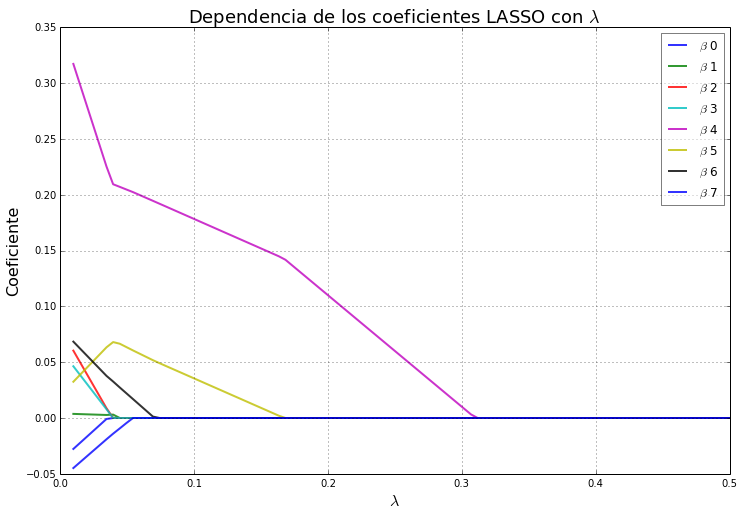

Para la prediccion de masa total para sistemas con alta perturbacion (lambda = 0.01): 

El atributo 4. Tiene importancia relativa de: 52.78%
El atributo 6. Tiene importancia relativa de: 11.38%
El atributo 2. Tiene importancia relativa de: 10.04%
El atributo 3. Tiene importancia relativa de: 7.71%
El atributo 7. Tiene importancia relativa de: 7.46%
El atributo 5. Tiene importancia relativa de: 5.4%
El atributo 0. Tiene importancia relativa de: 4.61%
El atributo 1. Tiene importancia relativa de: 0.61%


In [21]:
for i in range(len(alphas)):
    clf = linear_model.Lasso(alpha=alphas[i])
    clf.fit(X_high, Y_high[:,1])
    matrix[:,i]=clf.coef_

plt.figure(figsize=(12,8))
for j in range(8):
    plt.plot(alphas, matrix[j,:], lw=2, alpha=0.8, label=r"$\beta $ "+str(j))
plt.legend(framealpha=0.5)
plt.grid()
plt.xlabel(r"$\lambda$", fontsize=16)
plt.ylabel(r"Coeficiente", fontsize=16)
plt.title(r"Dependencia de los coeficientes LASSO con $\lambda$", fontsize=18)
plt.show()
plt.close()

print "Para la prediccion de masa total para sistemas con alta perturbacion (lambda = 0.01): \n"
relative_importance(matrix[:,0])

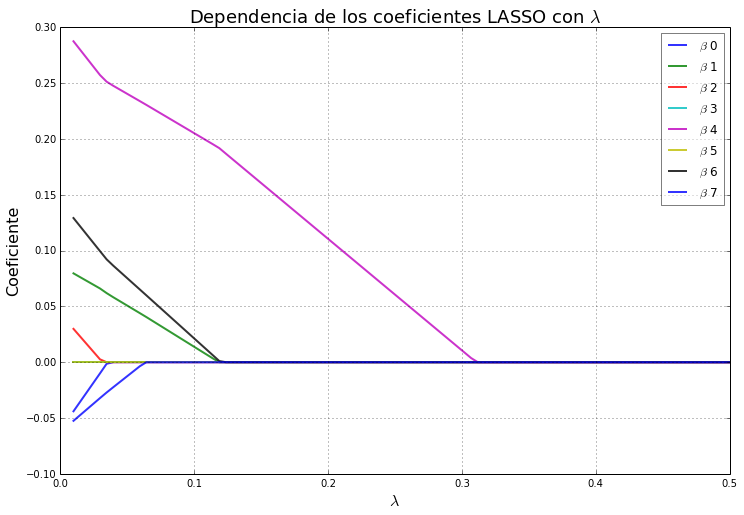

Para la prediccion de la eficiencia de masa para sistemas con baja perturbacion (lambda = 0.01): 

El atributo 4. Tiene importancia relativa de: 46.18%
El atributo 6. Tiene importancia relativa de: 20.74%
El atributo 1. Tiene importancia relativa de: 12.78%
El atributo 7. Tiene importancia relativa de: 8.43%
El atributo 0. Tiene importancia relativa de: 7.06%
El atributo 2. Tiene importancia relativa de: 4.8%
El atributo 3. Tiene importancia relativa de: 0.0%
El atributo 5. Tiene importancia relativa de: 0.0%


In [22]:
for i in range(len(alphas)):
    clf = linear_model.Lasso(alpha=alphas[i])
    clf.fit(X_high, Y_high[:,2])
    matrix[:,i]=clf.coef_

plt.figure(figsize=(12,8))
for j in range(8):
    plt.plot(alphas, matrix[j,:], lw=2, alpha=0.8, label=r"$\beta $ "+str(j))
plt.legend(framealpha=0.5)
plt.grid()
plt.xlabel(r"$\lambda$", fontsize=16)
plt.ylabel(r"Coeficiente", fontsize=16)
plt.title(r"Dependencia de los coeficientes LASSO con $\lambda$", fontsize=18)
plt.show()
plt.close()

print "Para la prediccion de la eficiencia de masa para sistemas con baja perturbacion (lambda = 0.01): \n"
relative_importance(matrix[:,0])

# Train, test, and validation test preparation

In [23]:
from sklearn.preprocessing import PolynomialFeatures

X_low_train, X_low_val, Y_low_train, Y_low_val = train_test_split(X_low, Y_low, train_size=0.80, random_state=1)
X_low_train, X_low_test, Y_low_train, Y_low_test = train_test_split(X_low_train, Y_low_train, train_size=0.80, random_state=2)

X_high_train, X_high_val, Y_high_train, Y_high_val = train_test_split(X_high, Y_high, train_size=0.80, random_state=3)
X_high_train, X_high_test, Y_high_train, Y_high_test = train_test_split(X_high_train, Y_high_train, train_size=0.80, random_state=4)

# Polynomial fit

In [24]:
def ajuste_poli(X_train, X_test, Y_train, Y_test, alfa, grado):
    poly = PolynomialFeatures(degree=grado)
    X_high_train_trans=poly.fit_transform(X_train)
    X_high_test_trans=poly.fit_transform(X_test)

    clf=linear_model.Lasso(alpha=alfa)
    clf.fit(X_high_train_trans, Y_train)
    
    return clf.score(X_high_test_trans, Y_test)

In [26]:
#Planetas-Low
print "Numero de planetas. Perturbacion baja:"
print "r^2="+str(round(ajuste_poli(X_low_train, X_low_test, Y_low_train[:,0], Y_low_test[:,0], 0.0001, 3),2))
#Masa total-Low
print "Masa total. Perturbacion baja:"
print "r^2="+ str(round(ajuste_poli(X_low_train, X_low_test, Y_low_train[:,1], Y_low_test[:,1], 0.0001, 2),2))
#Eficiencia-Low
print "Eficiencia de masa. Perturbacion baja:"
print "r^2="+ str(round(ajuste_poli(X_low_train, X_low_test, Y_low_train[:,2], Y_low_test[:,2], 0.0001, 2),2))
#Planetas-High
print "Numero de planetas. Perturbacion alta:"
print "r^2="+ str(round(ajuste_poli(X_high_train, X_high_test, Y_high_train[:,0], Y_high_test[:,0], 0.0001, 3),2))
#Masa total-High
print "Masa total. Perturbacion alta:"
print "r^2="+ str(round(ajuste_poli(X_high_train, X_high_test, Y_high_train[:,1], Y_high_test[:,1], 0.0001, 2),2))
#Eficiencia-High
print "Eficiencia de masa. Perturbacion alta:"
print "r^2="+ str(round(ajuste_poli(X_high_train, X_high_test, Y_high_train[:,2], Y_high_test[:,2], 0.0001, 2),2))

Numero de planetas. Perturbacion baja:
r^2=0.54
Masa total. Perturbacion baja:
r^2=0.11
Eficiencia de masa. Perturbacion baja:
r^2=0.16
Numero de planetas. Perturbacion alta:
r^2=0.64
Masa total. Perturbacion alta:
r^2=-0.06
Eficiencia de masa. Perturbacion alta:
r^2=0.04


# Machine Learning a través de bosques de clasificación

In [27]:
def fix(Y_fix):
    Y_fix[:,0]= Y_fix[:,0]//3
    
    Y_fix[:,1]=Y_fix[:,1]//1
    for i in range(len(Y_fix[:,1])):
        if Y_fix[i,1]>=10 and Y_fix[i,1]<=100:
            Y_fix[i,1]=Y_fix[i,1]//10*10
        elif Y_fix[i,1]>100 and Y_fix[i,1]<=1000:
            Y_fix[i,1]=Y_fix[i,1]//100*100
        elif Y_fix[i,1]>1000:
            Y_fix[i,1]=Y_fix[i,1]//1000*1000
            
    Y_fix[:,2]=Y_fix[:,2]//10
    for i in range(len(Y_fix[:,2])):
        if Y_fix[i,2]>=20 and Y_fix[i,2]<=100:
            Y_fix[i,2]=Y_fix[i,2]//10*10
        elif Y_fix[i,2]>100 and Y_fix[i,2]<=1000:
            Y_fix[i,2]=Y_fix[i,2]//100*100
        elif Y_fix[i,2]>1000:
            Y_fix[i,2]=Y_fix[i,2]//1000*1000

In [28]:
def forest(n_trees, prof, feat, X_train, Y_train, X_test, Y_test, print_mat):
    rf = RandomForestClassifier(n_estimators=n_trees, max_depth=prof, max_features=feat)
    rf.fit(X_train, Y_train)

    y_predict = rf.predict(X_test)
    matrix=confusion_matrix(Y_test, y_predict)
    if print_mat:
        print matrix
    return float(matrix.trace())/np.sum(matrix)

In [29]:
def explore_params(trees, profund, features, X_train, Y_train, X_test, Y_test):
    best_tree=0.0
    best_depth=0.0
    best_atrib=0.0
    hits=0.0
    for i in range(len(trees)):
        print i
        for j in range(len(profund)):
            for k in range(len(features)):
                temp=forest(trees[i], profund[j], features[k], X_train, Y_train, X_test, Y_test, 0)
                if temp>hits:
                    forest(trees[i], profund[j], features[k], X_train, Y_train, X_test, Y_test, 1)
                    print temp*100.0
                    best_tree=trees[i]
                    best_depth=profund[j]
                    best_atrib=features[k]
                    hits=temp
    return best_tree, best_depth, best_atrib

In [30]:
def importancia(tree, depth, feature, X_train, Y_train):
    rf = RandomForestClassifier(n_estimators=tree, max_depth=depth, max_features=feature)
    rf.fit(X_train, Y_train)
    atributo=[]
    importance=[]
    ii = np.argsort(rf.feature_importances_)
    for i in range(1,len(X_train[0,:])+1):
        atributo.append(ii[-1*i])
        importance.append(rf.feature_importances_[ii[-1*i]])
        print "Atributo: ", ii[-1*i], ". Importancia relativa: ", rf.feature_importances_[ii[-1*i]]
    return atributo, importance

In [33]:
arboles=np.arange(1, 182, 30)
depths=np.arange(1, 100, 10)
atrib=np.arange(1, 8, 1)

In [35]:
X_low=np.genfromtxt('data/X_low.csv', delimiter=',', dtype='float', skip_header=1)[:,1:]
Y_low=np.genfromtxt('data/Y_low.csv', delimiter=',', dtype='float', skip_header=1)[:,1:]
X_high=np.genfromtxt('data/X_high.csv', delimiter=',', dtype='float', skip_header=1)[:,1:]
Y_high=np.genfromtxt('data/Y_high.csv', delimiter=',', dtype='float', skip_header=1)[:,1:]
X_low=np.delete(X_low, 6, axis=1)
X_high=np.delete(X_high, 6, axis=1)

In [36]:
scax_low = sk.preprocessing.StandardScaler().fit(X_low)
scax_high = sk.preprocessing.StandardScaler().fit(X_high)

X_low=scax_low.transform(X_low)
X_high=scax_high.transform(X_high)

In [37]:
fix(Y_low)
fix(Y_high)

In [38]:
from sklearn.preprocessing import PolynomialFeatures

X_low_train, X_low_val, Y_low_train, Y_low_val = train_test_split(X_low, Y_low, train_size=0.80, random_state=1)
X_low_train, X_low_test, Y_low_train, Y_low_test = train_test_split(X_low_train, Y_low_train, train_size=0.80, random_state=2)

X_high_train, X_high_val, Y_high_train, Y_high_val = train_test_split(X_high, Y_high, train_size=0.80, random_state=3)
X_high_train, X_high_test, Y_high_train, Y_high_test = train_test_split(X_high_train, Y_high_train, train_size=0.80, random_state=4)

In [ ]:
print "Para perturbacion baja (Numero de planetas): \n"
b_tree_low_planets, b_depth_low_planets, b_atrib_low_planets = explore_params(arboles, depths, atrib, X_low_train, Y_low_train[:,0], X_low_test, Y_low_test[:,0])
importancia(b_tree_low_planets, b_depth_low_planets, b_atrib_low_planets, X_low_train, Y_low_train[:,0])

Para perturbacion baja (Numero de planetas): 

0
[[ 0  0  0  5  8  0  0  0  0]
 [ 0  0  0  5  6  0  0  0  0]
 [ 0  0  0 21 33  0  0  0  0]
 [ 0  0  0 68 80  0  0  0  0]
 [ 0  0  0 61 64  0  0  0  0]
 [ 0  0  0 19 39  0  0  0  0]
 [ 0  0  0  4 16  0  0  0  0]
 [ 0  0  0  3  5  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0]]
36.5296803653
[[  0  12   0   1   0   0   0   0   0]
 [  0   7   0   4   0   0   0   0   0]
 [  0   7   0  47   0   0   0   0   0]
 [  0   0   0 148   0   0   0   0   0]
 [  0   2   0 123   0   0   0   0   0]
 [  0   0   0  58   0   0   0   0   0]
 [  0   0   0  20   0   0   0   0   0]
 [  0   0   0   8   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0]]
36.7579908676
[[ 4  8  0  1  0  0  0  0  0]
 [ 3  4  1  2  1  0  0  0  0]
 [ 2  4  7 19 16  5  1  0  0]
 [ 0  0 16 83 40  8  1  0  0]
 [ 0  2  8 44 42 23  5  1  0]
 [ 1  0  3  7 20 21  6  0  0]
 [ 0  0  1  2  2  7  8  0  0]
 [ 0  0  0  2  3  2  1  0  0]
 [ 0  0  0  0  0  0  1  0  0]]
39.2694063927
[[ 9  3  0  1  

In [ ]:
print "Para perturbacion baja (Masa solida): \n"
b_tree_low_mass, b_depth_low_mass, b_atrib_low_mass = explore_params(arboles, depths, atrib, X_low_train, Y_low_train[:,1], X_low_test, Y_low_test[:,1])
importancia(b_tree_low_mass, b_depth_low_mass, b_atrib_low_mass, X_low_train, Y_low_train[:,1])

In [ ]:
print "Para perturbacion baja (Eficiencia de masa): \n"
b_tree_low_eff, b_depth_low_eff, b_atrib_low_eff = explore_params(arboles, depths, atrib, X_low_train, Y_low_train[:,2], X_low_test, Y_low_test[:,2])
importancia(b_tree_low_eff, b_depth_low_eff, b_atrib_low_eff, X_low_train, Y_low_train[:,2])

In [ ]:
print "Para perturbacion alta (Numero de planetas): \n"
b_tree_high_planets, b_depth_high_planets, b_atrib_high_planets = explore_params(arboles, depths, atrib, X_high_train, Y_high_train[:,0], X_high_test, Y_high_test[:,0])
importancia(b_tree_high_planets, b_depth_high_planets, b_atrib_high_planets, X_high_train, Y_high_train[:,0])

In [ ]:
print "Para perturbacion alta (Masa solida): \n"
b_tree_high_mass, b_depth_high_mass, b_atrib_high_mass = explore_params(arboles, depths, atrib, X_high_train, Y_high_train[:,1], X_high_test, Y_high_test[:,1])
importancia(b_tree_high_mass, b_depth_high_mass, b_atrib_high_mass, X_high_train, Y_high_train[:,1])

In [ ]:
print "Para perturbacion alta (Eficiencia de masa): \n"
b_tree_high_eff, b_depth_high_eff, b_atrib_high_eff = explore_params(arboles, depths, atrib, X_high_train, Y_high_train[:,2], X_high_test, Y_high_test[:,2])
importancia(b_tree_high_eff, b_depth_high_eff, b_atrib_high_eff, X_high_train, Y_high_train[:,2])